<a href="https://colab.research.google.com/github/cesaraugustopereirabr/SocialGraph_Insights/blob/main/SocialGraph_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SOCIALGRAPH INSIGHTS

*Análise de Engajamento e Comunidades em Redes Sociais com Grafos*

1. INTRODUÇÃO

# SocialGraph Insights

Este projeto apresenta um protótipo funcional de produto analítico baseado em grafos
capaz de gerar insights sobre engajamento, popularidade e comunidades em redes sociais.

O objetivo é demonstrar como técnicas de ciência de dados e teoria dos grafos
podem ser aplicadas para responder perguntas estratégicas como:

- Quem são os usuários mais influentes?
- Quais conexões são mais fortes?
- Existem comunidades bem definidas?
- Quais interesses concentram maior engajamento?
- Como as interações se distribuem na rede?

O projeto foi desenvolvido em Python, utilizando NetworkX, e é totalmente compatível
com Google Colab.

2. STACK E DEPENDÊNCIAS

## Tecnologias Utilizadas

- Python 3
- pandas
- numpy
- networkx
- matplotlib
- python-louvain (detecção de comunidades)

Todas as bibliotecas são compatíveis com o ambiente padrão do Google Colab.

3. INSTALAÇÃO DE DEPENDÊNCIAS (Código)

In [32]:
!pip install python-louvain

4. IMPORTAÇÃO DE BIBLIOTECAS (Código)

In [33]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import community.community_louvain as community_louvain

5. MODELAGEM DO PROBLEMA

## Modelagem do Grafo

- Nós representam usuários
- Arestas representam interações entre usuários
- O peso da aresta indica intensidade de engajamento
- O grafo é direcionado

6. DEFINIÇÃO DOS PESOS DE INTERAÇÃO (Código)

In [34]:
INTERACTION_WEIGHT = {
    "like": 1,
    "comment": 2,
    "share": 3
}

7. BASE DE DADOS FICTÍCIA – USUÁRIOS (Código)

In [35]:
users = pd.DataFrame({
    "user_id": [1,2,3,4,5,6,7,8],
    "name": [
        "Ana", "Bruno", "Carla", "Daniel",
        "Eduarda", "Felipe", "Gabriela", "Henrique"
    ],
    "interest": [
        "Tecnologia", "Direito", "Tecnologia", "IA",
        "Direito", "IA", "Tecnologia", "Direito"
    ]
})

users

,user_id,name,interest
0,1,Ana,Tecnologia
1,2,Bruno,Direito
2,3,Carla,Tecnologia
3,4,Daniel,IA
4,5,Eduarda,Direito
5,6,Felipe,IA
6,7,Gabriela,Tecnologia
7,8,Henrique,Direito


8. BASE DE DADOS FICTÍCIA – INTERAÇÕES (Código)

In [36]:
interactions = pd.DataFrame({
    "source": [1,1,2,3,3,4,5,6,7,8,2,6],
    "target": [2,3,3,4,5,6,6,7,8,1,5,4],
    "interaction_type": [
        "like","comment","share","comment",
        "like","share","comment","like",
        "share","like","comment","share"
    ],
    "count": [5,2,1,3,4,2,1,6,2,3,2,1]
})

interactions

,source,target,interaction_type,count
0,1,2,like,5
1,1,3,comment,2
2,2,3,share,1
3,3,4,comment,3
4,3,5,like,4
5,4,6,share,2
6,5,6,comment,1
7,6,7,like,6
8,7,8,share,2
9,8,1,like,3


9. CÁLCULO DO PESO FINAL DAS ARESTAS (Código)

In [37]:
interactions["weight"] = interactions.apply(
    lambda row: INTERACTION_WEIGHT[row["interaction_type"]] * row["count"],
    axis=1
)

interactions

,source,target,interaction_type,count,weight
0,1,2,like,5,5
1,1,3,comment,2,4
2,2,3,share,1,3
3,3,4,comment,3,6
4,3,5,like,4,4
5,4,6,share,2,6
6,5,6,comment,1,2
7,6,7,like,6,6
8,7,8,share,2,6
9,8,1,like,3,3


10. CONSTRUÇÃO DO GRAFO (Código)

In [38]:
G = nx.DiGraph()

# Adiciona usuários
for _, row in users.iterrows():
    G.add_node(row["user_id"], name=row["name"], interest=row["interest"])

# Adiciona interações
for _, row in interactions.iterrows():
    G.add_edge(
        row["source"],
        row["target"],
        weight=row["weight"],
        interaction=row["interaction_type"]
    )

11. MÉTRICAS DE CENTRALIDADE

## Métricas de Engajamento e Influência

Serão calculadas:
- Grau de entrada (popularidade)
- Grau de saída (atividade)
- PageRank (influência)

12. CÁLCULO DAS MÉTRICAS (Código)

In [39]:
degree_in = dict(G.in_degree(weight="weight"))
degree_out = dict(G.out_degree(weight="weight"))
pagerank = nx.pagerank(G, weight="weight")

metrics = pd.DataFrame({
    "user_id": list(G.nodes),
    "degree_in": [degree_in.get(n,0) for n in G.nodes],
    "degree_out": [degree_out.get(n,0) for n in G.nodes],
    "pagerank": [pagerank.get(n,0) for n in G.nodes]
})

metrics = metrics.merge(users, on="user_id")
metrics.sort_values("pagerank", ascending=False)

,user_id,degree_in,degree_out,pagerank,name,interest
5,6,8,9,0.204004,Felipe,IA
6,7,6,6,0.134352,Gabriela,Tecnologia
7,8,6,3,0.132949,Henrique,Direito
0,1,3,9,0.131758,Ana,Tecnologia
3,4,9,6,0.126542,Daniel,IA
2,3,7,10,0.098021,Carla,Tecnologia
4,5,8,2,0.091405,Eduarda,Direito
1,2,5,7,0.080969,Bruno,Direito


13. QUERIES ANALÍTICAS

## Queries Analíticas

- Usuários mais influentes
- Usuários mais ativos
- Usuários mais populares

14. QUERIES (Código)

In [40]:
# Mais influentes
metrics.sort_values("pagerank", ascending=False).head(5)

# Mais ativos
metrics.sort_values("degree_out", ascending=False).head(5)

# Mais populares
metrics.sort_values("degree_in", ascending=False).head(5)

,user_id,degree_in,degree_out,pagerank,name,interest
3,4,9,6,0.126542,Daniel,IA
4,5,8,2,0.091405,Eduarda,Direito
5,6,8,9,0.204004,Felipe,IA
2,3,7,10,0.098021,Carla,Tecnologia
6,7,6,6,0.134352,Gabriela,Tecnologia


15. DETECÇÃO DE COMUNIDADES

## Detecção de Comunidades

Utiliza o algoritmo de Louvain para identificar grupos densamente conectados.

16. COMUNIDADES COM LOUVAIN (Código)

In [41]:
# Conversão para grafo não-direcionado
undirected_G = G.to_undirected()

# Detecção de comunidades com Louvain
partition = community_louvain.best_partition(undirected_G)

# Atribui comunidade como atributo do nó
nx.set_node_attributes(G, partition, "community")

partition

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1}

17. VISUALIZAÇÃO DO GRAFO (Código)

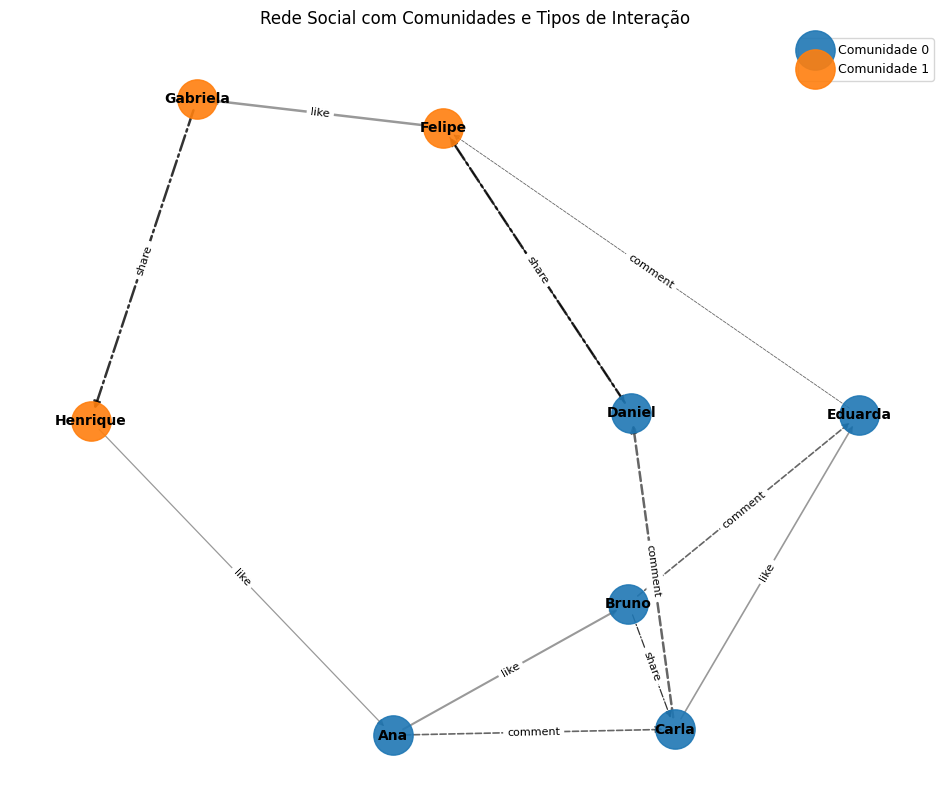

In [42]:
plt.figure(figsize=(12, 10))

# Layout fixo para reprodutibilidade
pos = nx.spring_layout(G, seed=42)

# Comunidades
communities = list(set(partition.values()))
colors = plt.cm.tab10.colors

# Desenha nós por comunidade
for comm in communities:
    nodes = [n for n in G.nodes if partition[n] == comm]
    nx.draw_networkx_nodes(
        G,
        pos,
        nodelist=nodes,
        node_color=[colors[comm]],
        node_size=800,
        alpha=0.9,
        label=f"Comunidade {comm}"
    )

# Estilos por tipo de interação
edge_styles = {
    "like": {"style": "solid", "alpha": 0.4},
    "comment": {"style": "dashed", "alpha": 0.6},
    "share": {"style": "dashdot", "alpha": 0.8}
}

# Desenha arestas por tipo de interação
for interaction, style in edge_styles.items():
    edges = [
        (u, v) for u, v, d in G.edges(data=True)
        if d.get("interaction") == interaction
    ]
    weights = [
        G[u][v]["weight"] for u, v in edges
    ]

    nx.draw_networkx_edges(
        G,
        pos,
        edgelist=edges,
        width=[w * 0.3 for w in weights],
        style=style["style"],
        alpha=style["alpha"],
        label=interaction.capitalize()
    )

# Rótulos dos nós
nx.draw_networkx_labels(
    G,
    pos,
    labels={n: G.nodes[n]["name"] for n in G.nodes},
    font_size=10,
    font_weight="bold"
)

# Rótulos das arestas (tipo de interação)
edge_labels = {
    (u, v): d["interaction"]
    for u, v, d in G.edges(data=True)
}

nx.draw_networkx_edge_labels(
    G,
    pos,
    edge_labels=edge_labels,
    font_size=8
)

# Legenda
plt.legend(scatterpoints=1, fontsize=9, loc="best")

plt.title("Rede Social com Comunidades e Tipos de Interação")
plt.axis("off")
plt.show()

18. INSIGHTS FINAIS

## Insights Gerados

- Usuários com maior PageRank exercem influência desproporcional na rede
- Comunidades se organizam fortemente por interesse
- Interações do tipo compartilhamento geram maior impacto estrutural
- O grafo permite análises estratégicas de engajamento e difusão de informação

Este protótipo demonstra viabilidade de um produto analítico baseado em grafos
para redes sociais, marketing, opinião pública e análise institucional.


19. PRÓXIMOS PASSOS

## Próximos Passos

- Integração com dados reais (Twitter, Mastodon, Reddit)
- Persistência em banco orientado a grafos (Neo4j)
- Criação de API de consultas
- Dashboard interativo
- Aplicação em contextos jurídicos e institucionais